# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [30]:
using Clustering, CSV, DataFrames, Gadfly


## 讀取資料

In [10]:
data = CSV.read("s1-set.csv", DataFrame)
first(data, 10)

10×2 DataFrame
│ Row │ x      │ y      │
│     │ Int64  │ Int64  │
├─────┼────────┼────────┤
│ 1   │ 664159 │ 550946 │
│ 2   │ 665845 │ 557965 │
│ 3   │ 597173 │ 575538 │
│ 4   │ 618600 │ 551446 │
│ 5   │ 635690 │ 608046 │
│ 6   │ 588100 │ 557588 │
│ 7   │ 582015 │ 546191 │
│ 8   │ 604678 │ 574577 │
│ 9   │ 572029 │ 518313 │
│ 10  │ 604737 │ 574591 │

In [15]:
X = Matrix(data[:, 1:2])'  #乾那麼邪教 加個 ' 直接反轉矩陣

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [17]:
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([416754.88613138685 168840.82890855457 … 139395.22898550724 617870.0744047619; 168273.35766423357 345737.02064896753 … 558143.9420289855 398983.2589285714], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  12, 12, 12, 12, 12, 12, 12, 12, 12, 12], [3.868603093541992e9, 3.784863740838379e9, 8.956930531298828e7, 6.740235058618164e8, 1.976029744717041e9, 6.258253758146973e8, 1.402054662494873e9, 3.6132858852539062e6, 4.345366158831543e9, 3.3965333364257812e6  …  2.782454939169922e8, 5.595652414916992e9, 2.9773947540195312e9, 1.2777467247363281e8, 4.674976160428711e9, 1.0817732159863281e8, 4.381570026557617e8, 4.130407882919922e8, 5.097647169803223e9, 5.81265660621582e8], [685, 339, 344, 314, 297, 97, 315, 341, 228, 351, 329, 352, 327, 345, 336], [685, 339, 344, 314, 297, 97, 315, 341, 228, 351, 329, 352, 327, 345, 336], 1.4742805086197453e13, 8, true)

In [27]:
data[!, :cluster] = string.(assignments(result));

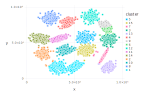

In [31]:
plot(data, x="x", y="y", color="cluster", Geom.point)